In [4]:
pip install tensorflow --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ------------------------------------ 266.3/266.3 MB 626.1 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 589.0 kB/s eta 0:00:00
     --------------------------------------- 57.5/57.5 kB 68.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 458.5 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 280.2 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 252.3 kB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 782.6 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 187.5 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 753.0 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 973.6 kB/s eta 0:00:00
     ------------------------------------ 177.0/177.0 kB 484.9 kB/s eta 0:00:00
     ----------------------------------

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn

In [3]:
dataframe=pd.read_csv(r'C:\Users\Tushar\Desktop\New folder\IBM Attrition Data.csv',encoding='latin1')

In [4]:
dataframe

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [5]:
dataframe.head(20)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,No,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,No,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,No,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,No,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [22]:
names=dataframe.columns.values

In [23]:
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


Text(0.5, 1.0, 'Age Distribution Of Employees')

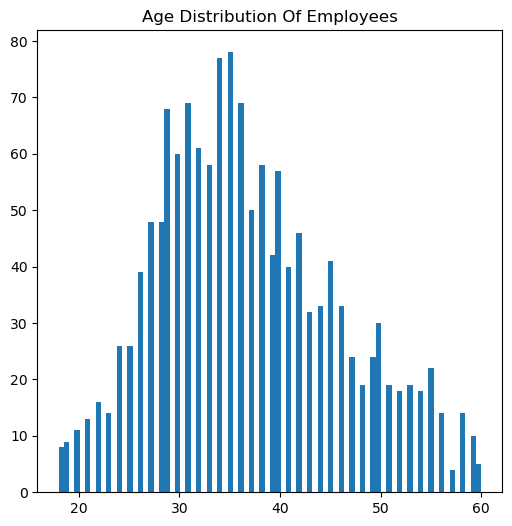

In [61]:
plt.figure(figsize=(6,6))
dataframe['Age'].hist(bins=80,grid=False)
xlabel=('Age')
ylabel=('No. Of Employees')
plt.title('Age Distribution Of Employees')

Text(0.5, 1.0, 'Attrition By Age')

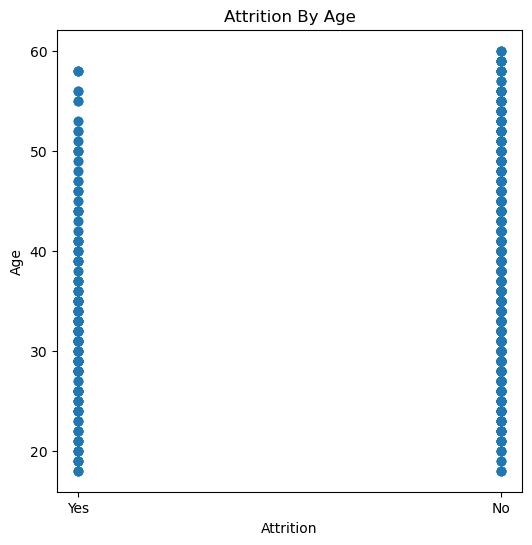

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(dataframe['Attrition'],dataframe['Age'])
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Attrition By Age')

Text(0, 0.5, 'Attrition')

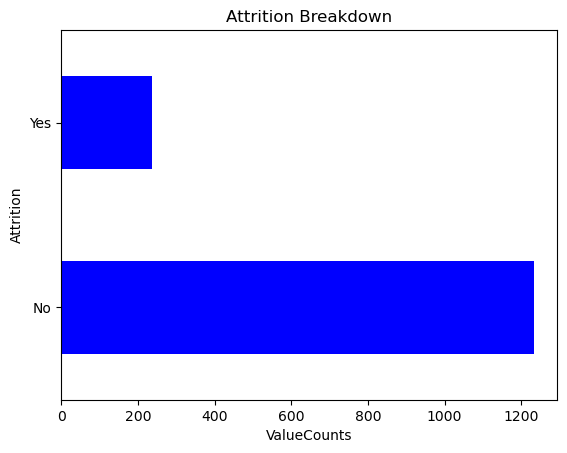

In [47]:
dataframe.Attrition.value_counts().plot(kind='barh',color='blue')
plt.title('Attrition Breakdown')
plt.xlabel('ValueCounts')
plt.ylabel('Attrition')

Text(0, 0.5, 'ValueCounts')

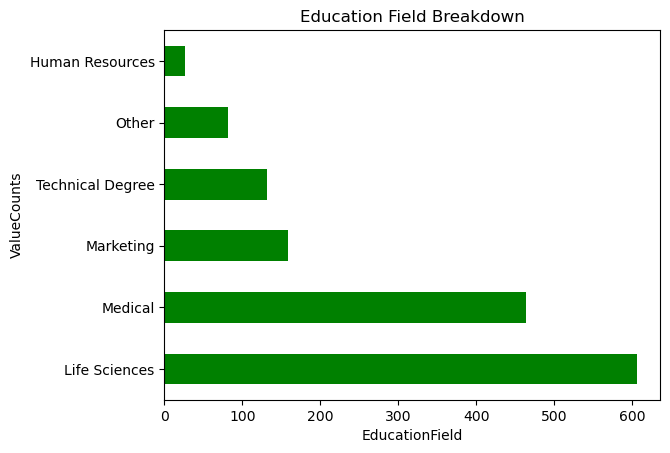

In [49]:
dataframe.EducationField.value_counts().plot(kind='barh',color='green')
plt.title('Education Field Breakdown')
plt.xlabel('EducationField')
plt.ylabel('ValueCounts')

Text(0, 0.5, 'Marital Status')

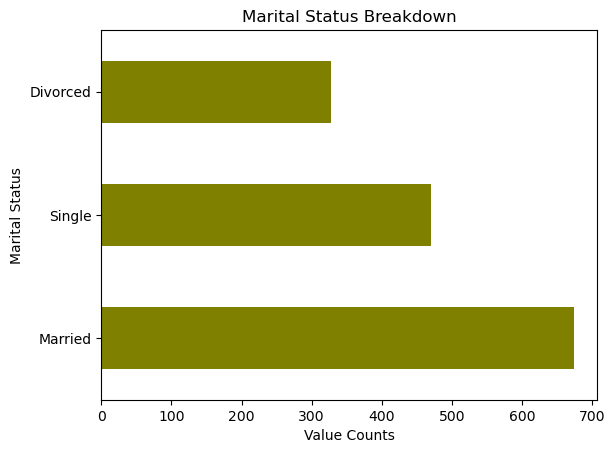

In [51]:
dataframe.MaritalStatus.value_counts().plot(kind='barh',color='olive')
plt.title('Marital Status Breakdown')
plt.xlabel('Value Counts')
plt.ylabel('Marital Status')

In [52]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [53]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [55]:
dataframe.std()

C:\Users\Tushar\AppData\Local\Temp\ipykernel_4432\3401367348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

Text(0.5, 1.0, 'Department Breakdown')

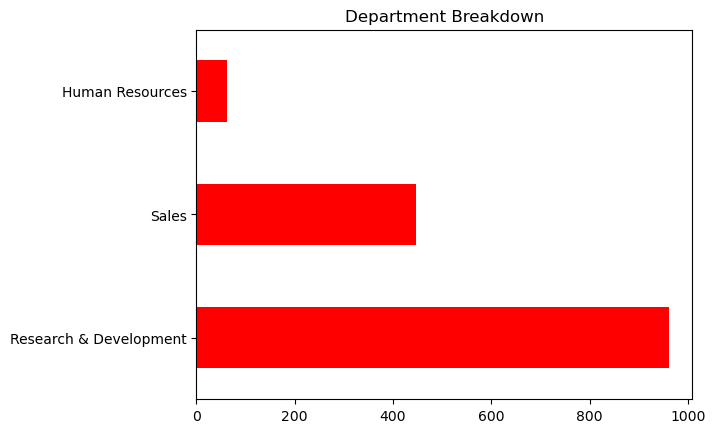

In [80]:
dataframe.Department.value_counts().plot(kind='barh',color='r')
plt.title('Department Breakdown')

Text(0.5, 1.0, 'Monthly Income')

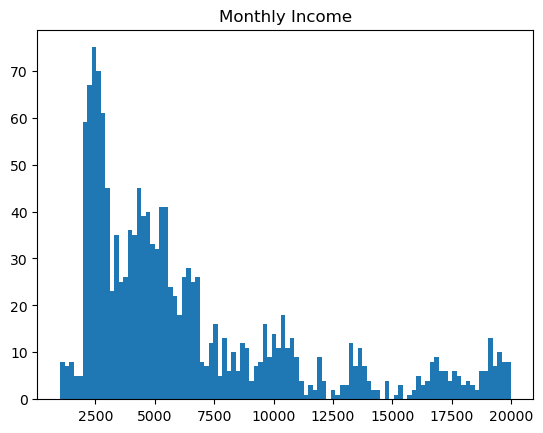

In [79]:
dataframe['MonthlyIncome'].hist(bins=100,grid=False)
plt.title('Monthly Income')

Text(0.5, 1.0, 'Number Of Companies Worked')

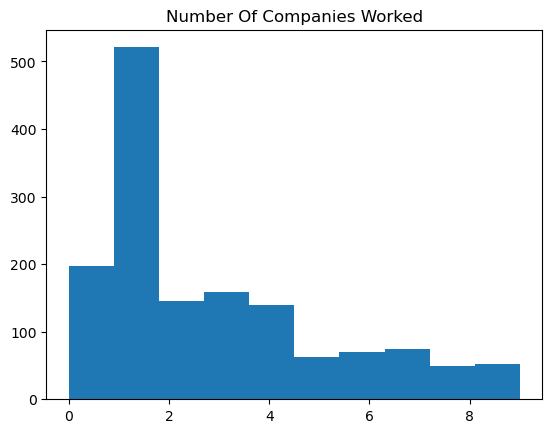

In [78]:
dataframe.NumCompaniesWorked.hist(grid=False)
plt.title('Number Of Companies Worked')

Text(0.5, 1.0, 'Job Satisfaction')

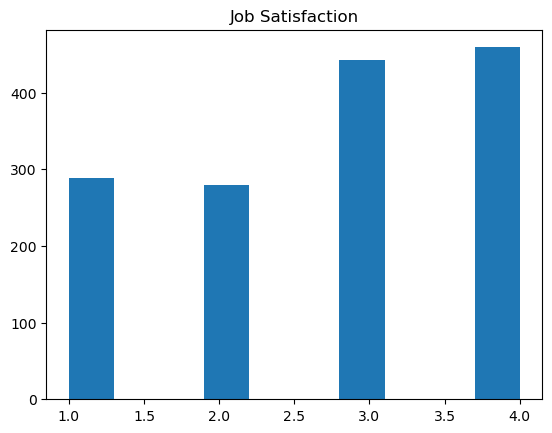

In [77]:
dataframe.JobSatisfaction.hist(grid=False,bins=10)
plt.title('Job Satisfaction')

Text(0.5, 1.0, 'Years At Company')

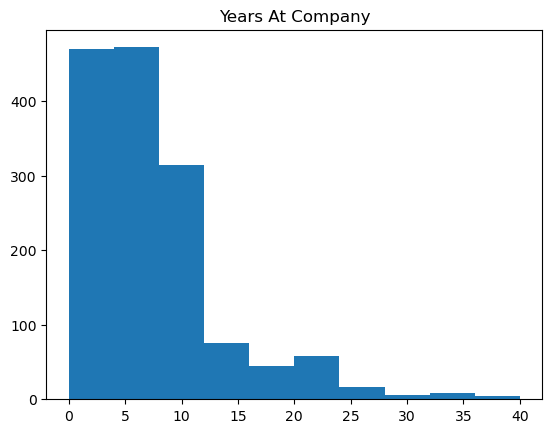

In [83]:
dataframe.YearsAtCompany.hist(grid=False)
plt.title('Years At Company')

Text(0.5, 1.0, 'Environment Satisfaction')

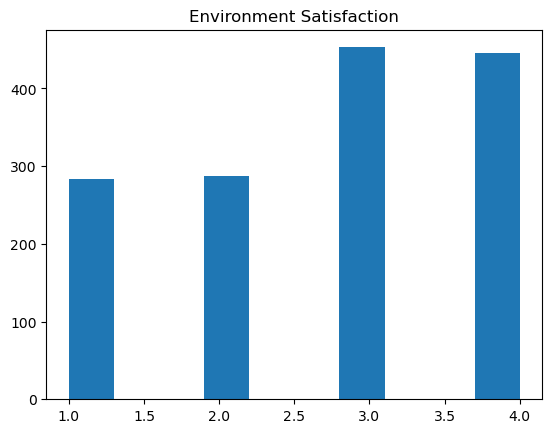

In [86]:
dataframe.EnvironmentSatisfaction.hist(grid=False)
plt.title('Environment Satisfaction')

Text(0.5, 1.0, 'Work Life Balance')

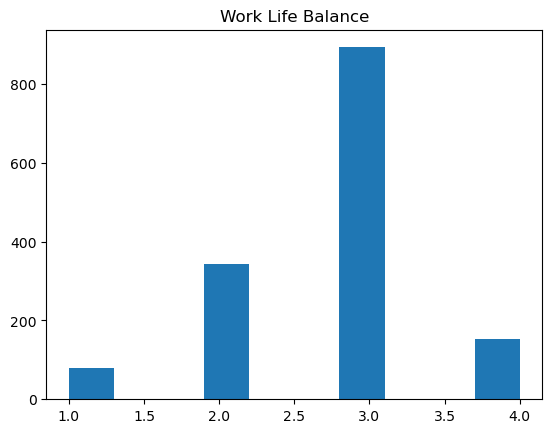

In [88]:
dataframe.WorkLifeBalance.hist(grid=False)
plt.title('Work Life Balance')

In [6]:
dataframe.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object